In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
income_df = pd.read_csv('income.csv')
income_df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


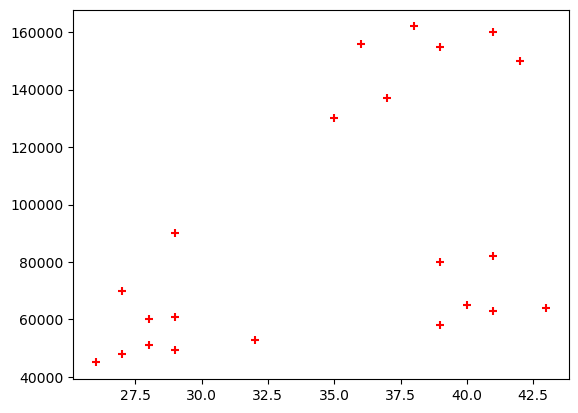

In [5]:
plt.scatter(income_df['Age'], income_df['Income($)'], color='red', marker='+')

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(income_df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [11]:
income_df['cluster'] = y_predicted
income_df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


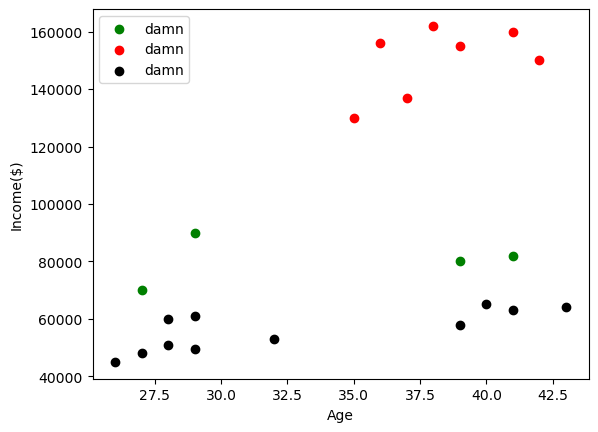

In [19]:
df1 = income_df[income_df.cluster == 0]
df2 = income_df[income_df.cluster == 1]
df3 = income_df[income_df.cluster == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['damn', 'damn', 'damn'])

In [26]:
len(income_df)

22

In [30]:
scaler = MinMaxScaler()
scaler.fit(income_df[['Income($)']])
income_df['Income($)'] = scaler.transform(income_df[['Income($)']])

scaler.fit(income_df[['Age']])
income_df['Age'] = scaler.transform(income_df[['Age']])
income_df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


## We must train on the dataset again because now it is scaled

In [33]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(income_df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [34]:
income_df['cluster'] = y_predicted
income_df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [36]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

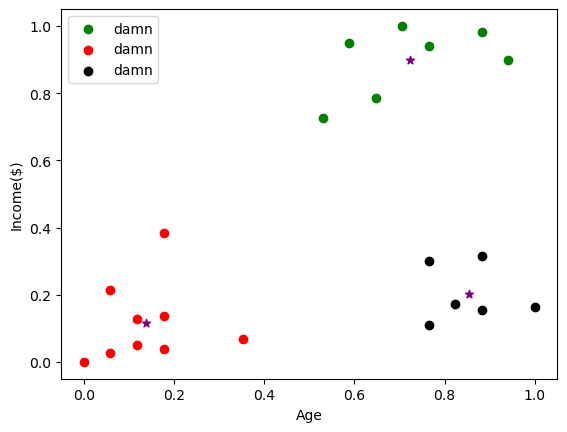

In [37]:
df1 = income_df[income_df.cluster == 0]
df2 = income_df[income_df.cluster == 1]
df3 = income_df[income_df.cluster == 2]
plt.scatter(df1['Age'], df1['Income($)'], color='green')
plt.scatter(df2['Age'], df2['Income($)'], color='red')
plt.scatter(df3['Age'], df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['damn', 'damn', 'damn'])

## This is how to find the best K for KMeans

In [38]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(income_df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\odune\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.2761293767785354,
 0.21055478995472487,
 0.16858512236029757,
 0.1376250414652804,
 0.10824862283029263]

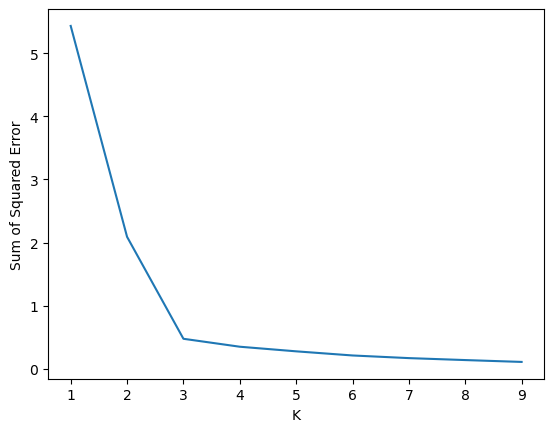

In [40]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)